# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [423]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
import time

In [259]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [260]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

It appears that there are no missing values. Data type for outcome 'y' should be boolean type and later transformed to numerical values 0 or 1.

In [262]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [263]:
df =df.replace({'y': {'yes': True, 'no': False}})
df['y'].value_counts()

C:\Users\megha\AppData\Local\Temp\ipykernel_16744\1416287714.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df =df.replace({'y': {'yes': True, 'no': False}})


y
False    36548
True      4640
Name: count, dtype: int64

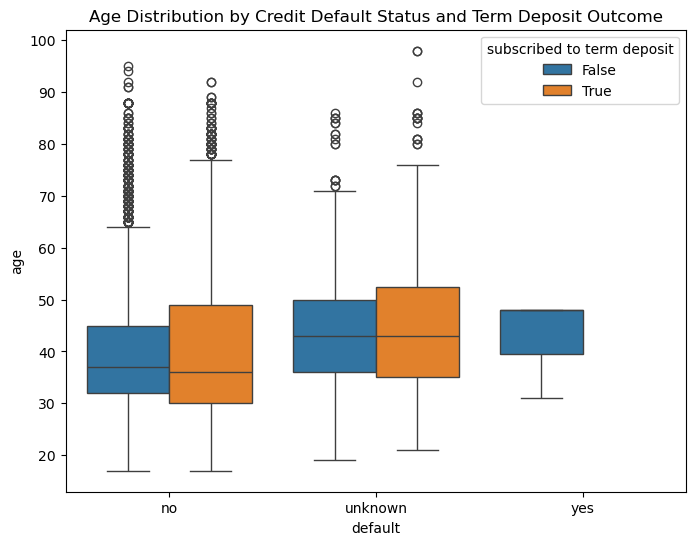

In [400]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="default", y="age", hue="y")
plt.title('Age Distribution by Credit Default Status and Term Deposit Outcome')
plt.legend(title='subscribed to term deposit') 
plt.savefig("PA3_images/age_and_credit_outcome.png")

Data visualization shows that people who have credit in default don't have term deposits.

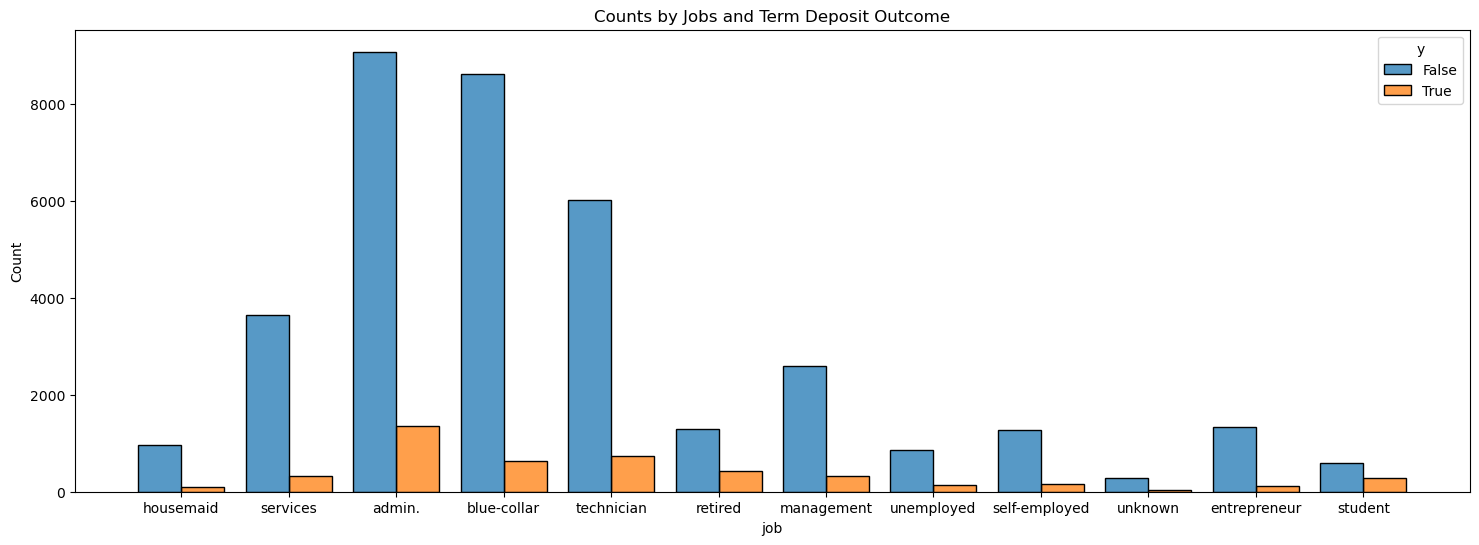

In [403]:
plt.figure(figsize=(18, 6))
sns.histplot(df, x="job", hue ="y",multiple="dodge",shrink=.8)
plt.title('Counts by Jobs and Term Deposit Outcome')
plt.savefig("PA3_images/counts_by_jobs_and_outcome.png")

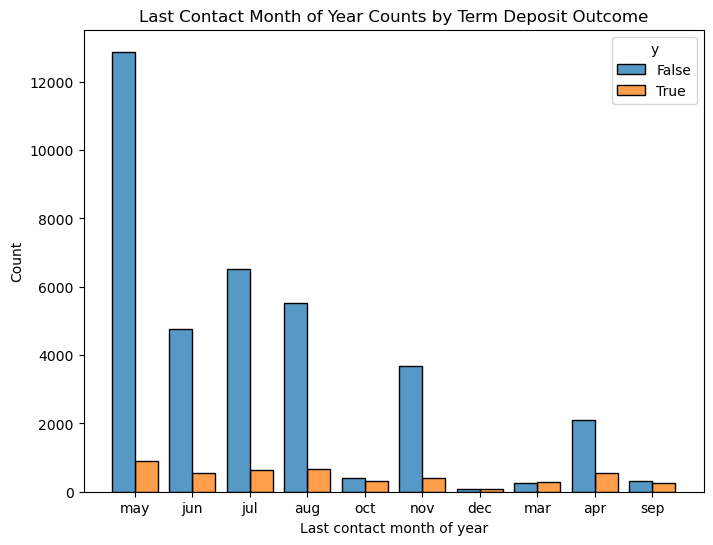

In [404]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x="month", hue ="y",multiple="dodge", shrink=.8)
plt.title('Last Contact Month of Year Counts by Term Deposit Outcome')
plt.xlabel('Last contact month of year')
plt.savefig("PA3_images/last_contact_month_counts_by_outcome.png")

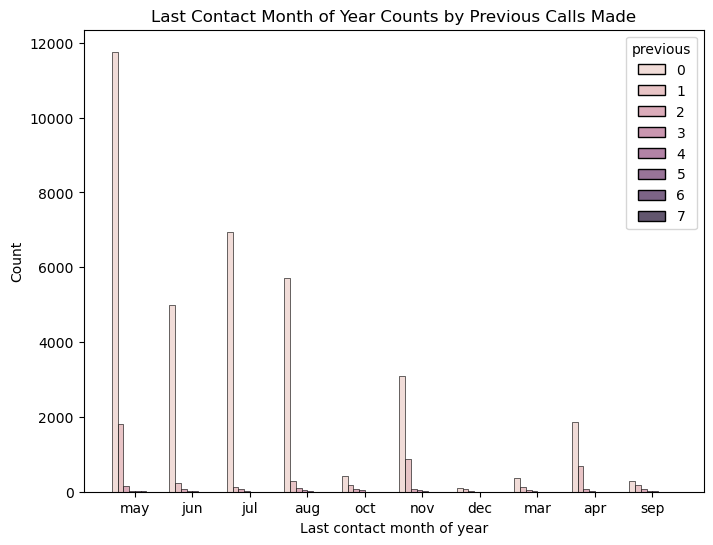

In [405]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x="month", hue ="previous",multiple="dodge", shrink=.8)
plt.title('Last Contact Month of Year Counts by Previous Calls Made')
plt.xlabel('Last contact month of year')
plt.savefig("PA3_images/last_contact_month_counts_by_previous_calls.png")

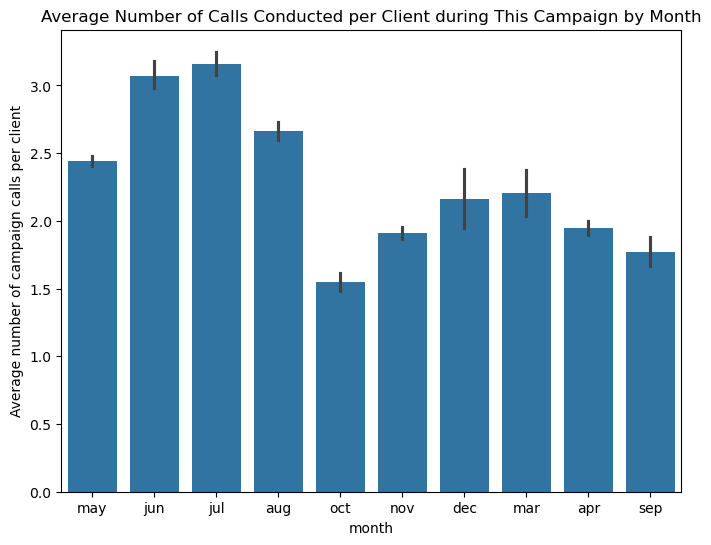

In [417]:
plt.figure(figsize=(8, 6))
sns.barplot(df, x="month", y="campaign")
plt.title('Average Number of Calls Conducted per Client during This Campaign by Month')
plt.ylabel('Average number of campaign calls per client')
plt.savefig("PA3_images/average_number_of_calls_by_month.png")

Data visualization shows that the campaign was mainly done from May to August. It slowed down in November and April. And there were little activities in other months.

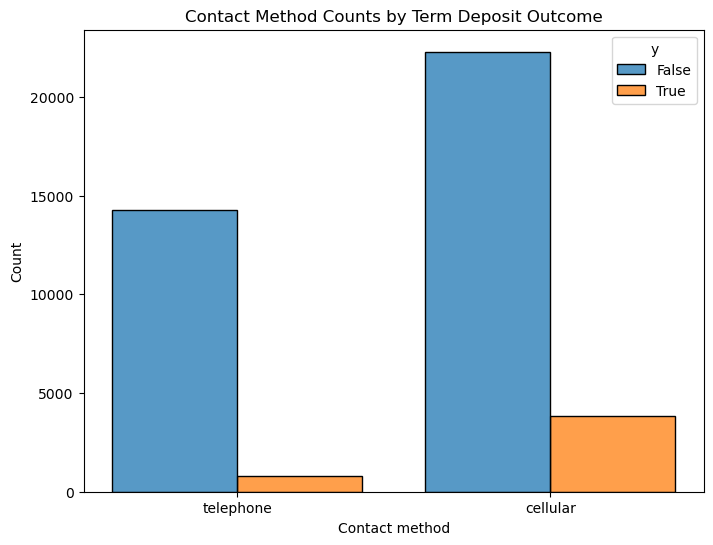

In [410]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x="contact", hue ="y",multiple="dodge", shrink=.8)
plt.title('Contact Method Counts by Term Deposit Outcome')
plt.xlabel('Contact method')
plt.savefig("PA3_images/contact_method_and_outcome.png")

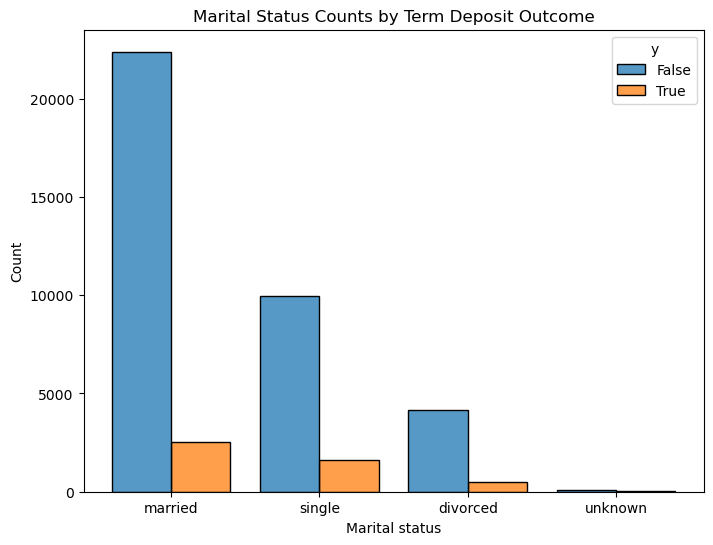

In [411]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x="marital", hue ="y",multiple="dodge", shrink=.8)
plt.title('Marital Status Counts by Term Deposit Outcome')
plt.xlabel('Marital status')
plt.savefig("PA3_images/marital_status_and_outcome.png")

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The Business Objective of the task is to identify the classifier (k-nearest neighbors, logistic regression, decision trees, and support vector machines) that is most suitable to predict whether a bank's client has subscribed to a term deposit based on bank information features.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [375]:
X= df[['age','job','marital','education','default','housing','loan']]
y = df['y']

In [376]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [377]:
# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [378]:
#Transform categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [380]:
baseline = df['y'].value_counts(normalize = True).iloc[0]
print(baseline)

0.8873458288821987


The baseline performance that our classifiers should aim to beat is an accuracy of 0.8873.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [381]:
lgr = LogisticRegression()
lgr_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('lgr', lgr)
    ])

In [382]:
lgr_pipe.fit(X_train, y_train)
lgr_preds = lgr_pipe.predict(X_test)

To understand each feature's impact on outcome, we sort the coefficients from largest to smallest. Because data is scaled, we can think of each coefficient's absolute value as the relative importance of the corresponding feature.

In [383]:
feature_names = lgr_pipe.named_steps['preprocessor'].get_feature_names_out() 
clean_names = [i.split('__')[-1] for i in feature_names]
coef_df = pd.DataFrame({'feature': clean_names, 'coefs': lgr_pipe.named_steps['lgr'].coef_[0]})
coef_df['coefs_abs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by = 'coefs_abs', ascending = False)
coef_df

,feature,coefs,coefs_abs
8,job_student,1.155642,1.155642
22,default_unknown,-0.954257,0.954257
5,job_retired,0.678542,0.678542
2,job_entrepreneur,-0.425305,0.425305
13,marital_single,0.397186,0.397186
1,job_blue-collar,-0.377148,0.377148
3,job_housemaid,-0.320265,0.320265
10,job_unemployed,0.290177,0.290177
7,job_services,-0.273896,0.273896
6,job_self-employed,-0.263645,0.263645


From analyzing the coefficients of the simple regression model, we have the following observations:
1) Employment status has the biggest predictive power on whether a client will subscribe to term deposit. Students and retirees have stronger preference for term deposits compared to people with jobs. Unemployed people prefer term deposits. Entrepreneurs especially dislike term deposits, which can be explained by their high-risk tolerance.
2) Credit is another strong indicator. People with good credit are more likely to subscribe to a term deposit. Data visualization shows that people who have credit in default don't have term deposits without exception. This can be explained by lack of self-discipline in spending.
3) Clients' education, age and whether they have housing or personal loans are less important when it comes to choosing to subscribe to a term deposit.
4) The effect of marital status is less obvious because there are more married clients in the dataset and one of the couples can hold term deposits for both.

### Problem 9: Score the Model

What is the accuracy of your model?

In [385]:
lgr_acc = lgr_pipe.score(X_test, y_test)
print(lgr_acc)

0.8880256385354958


The accuracy of the simple Logistic Regression Model is slightly better than the baseline.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [387]:
results = []

In [388]:
# Define the models
models = {
    'knn': KNeighborsClassifier(),
    'logisticregression': LogisticRegression(),
    'decisiontreeclassifier': DecisionTreeClassifier(),
    'svc': SVC()
}

In [389]:
for name, model in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])
    
    # Fit the model and time it
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    fit_time = time.time() - start_time
    
    # Evaluate on training and test sets
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    
    # Append the results
    results.append([name, fit_time, train_score, test_score])

In [390]:
# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Time','Train Accuracy', 'Test Accuracy'])
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,knn,0.090164,0.888446,0.871710
1,logisticregression,0.127877,0.887119,0.888026
2,decisiontreeclassifier,0.628018,0.916966,0.864038
3,svc,58.310845,0.887831,0.888220


When using the default setting of each model, Logistic Regression has the best performance on this dataset with high accuracy, only second to SVM classifier and much faster training speed, since Logistic Regression has much lower training complexity compared to SVM. Logistic Regression is also superior among these classifiers due to its high interpretability. 

KNN and Decision Tree models also have short fit time. But their test accuracy is below the baseline. The Decision Tree classifier appears to be overfitted.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Grid search the hyperparameters for KNN models with 3, 5, and 7 neighbors, Logistic Regression with different levels of regularization, SVM with linear, polynomial and Gaussian kernels, and Decision Tree with maximum depth 5, 10 and 15.

In [419]:
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3,5,7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1,1,10]}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5,10,15]}),
    'svc': (SVC(), {'svc__kernel': ['linear','poly','rbf']})
}

In [420]:
new_results = []

In [421]:
for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    
    # Append the results
    new_results.append([name, fit_time, train_score, test_score])

In [422]:
new_results_df = pd.DataFrame(new_results, columns=['Model', 'Average Train Time','Train Accuracy', 'Test Accuracy'])
new_results_df

,Model,Average Train Time,Train Accuracy,Test Accuracy
0,knn,14.969475,0.889806,0.883364
1,logisticregression,0.232716,0.887119,0.888026
2,decisiontreeclassifier,0.270339,0.887734,0.887831
3,svc,71.443179,0.887831,0.888220


Grid search was conducted to fine tune the hyperparameters and improve the models. The performance of Decision Tree Classifier improved by limiting tree depth to reduce overfitting. Its accuracy is above baseline. The test accuracy of KNN model also improved after changing the number of neighbors, but the test accuracy is still below baseline and the average train time got much longer. 

The performance of Logistic Regression didn't change after tightening and relaxing regularization hyperparameter. And the performance of SVM didn't change after testing out linear and polynomial kernels.

Logistic Regression is the best classifier for predicting whether a client would subscribe to term deposit based on banking information. It has the second highest test accuracy, and the lowest train time. The result has high interpretability. Logistic Regression is great for classifying linear features.

##### Questions